In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set()

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel('nyc_crimes.xls', skiprows=4)

In [3]:
df.head(15)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan
5,Alfred Village,4089.000,5.000,0.000,nan,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan
6,Allegany Village,1781.000,3.000,0.000,nan,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
7,Amherst Town,118296.000,107.000,1.000,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
8,Amityville Village,9519.000,9.000,0.000,nan,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
9,Amsterdam,18182.000,30.000,0.000,nan,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


In [4]:
df.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
347,Yorktown Town,36643.000,15.000,0.000,nan,0.000,2.000,13.000,334.000,45.000,287.000,2.000,nan
348,1 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
349,2 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
350,3 The FBI does not publish arson data unless i...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
df = df.drop([348, 349, 350])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 38.1+ KB


In [7]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [8]:
# Create feature set including target variable
features = pd.DataFrame()
features['property_crime'] = df['Property\ncrime']
features['population'] = df['Population']
features['pop_square'] = df['Population'] ** 2
features['murder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
features['robbery'] = np.where(df['Robbery'] > 0, 1, 0)

features.head()

,property_crime,population,pop_square,murder,robbery
0,12.000,1861.000,3463321.000,0,0
1,24.000,2577.000,6640929.000,0,0
2,16.000,2846.000,8099716.000,0,0
3,4090.000,97956.000,9595377936.000,1,1
4,223.000,6388.000,40806544.000,0,1


In [9]:
features.describe()

,property_crime,population,pop_square,murder,robbery
count,348.000,348.000,348.000,348.000,348.000
mean,792.606,40037.632,203554650960.236,0.141,0.601
std,7659.725,450037.368,3778875542708.129,0.348,0.490
min,0.000,526.000,276676.000,0.000,0.000
25%,40.500,3003.000,9018117.000,0.000,0.000
50%,112.500,7233.500,52325684.500,0.000,1.000
75%,341.000,18427.500,339753567.000,0.000,1.000
max,141971.000,8396126.000,70494931807876.000,1.000,1.000


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 5 columns):
property_crime    348 non-null float64
population        348 non-null float64
pop_square        348 non-null float64
murder            348 non-null int64
robbery           348 non-null int64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


                property_crime  population  pop_square  murder  robbery
property_crime           1.000       0.996       0.991   0.191    0.079
population               0.996       1.000       0.998   0.162    0.064
pop_square               0.991       0.998       1.000   0.133    0.044
murder                   0.191       0.162       0.133   1.000    0.313
robbery                  0.079       0.064       0.044   0.313    1.000


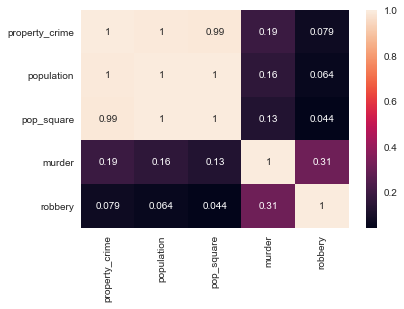

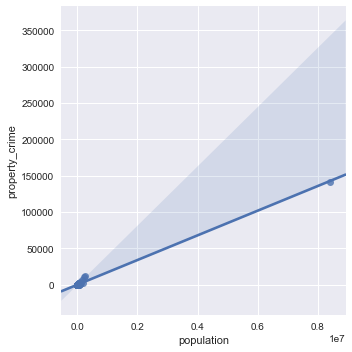

In [11]:
corrmat = features.corr()
print(corrmat)

sns.heatmap(corrmat, annot=True)

sns.lmplot(
    x='population',
    y='property_crime', 
    data=features,
    scatter=True
)

plt.show()

In [12]:
# missing data
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
robbery,0,0.000
murder,0,0.000
pop_square,0,0.000
population,0,0.000
property_crime,0,0.000


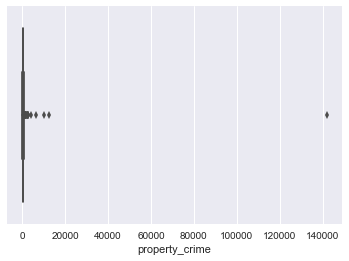

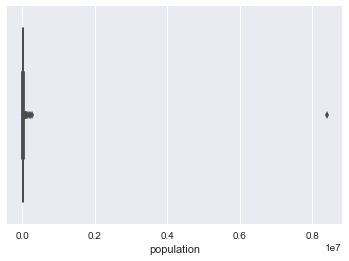

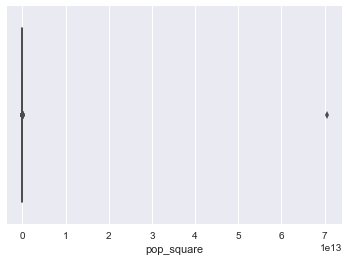

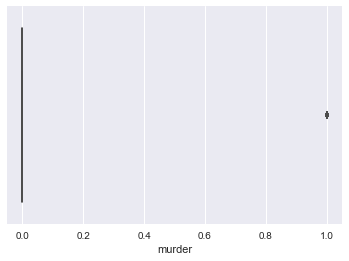

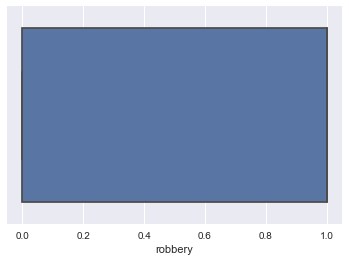

In [13]:
for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

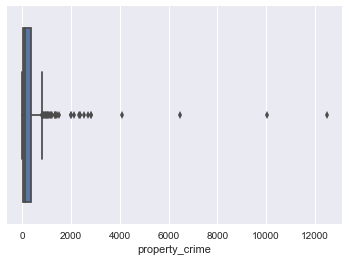

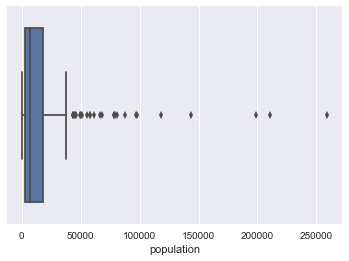

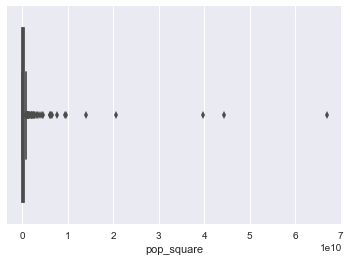

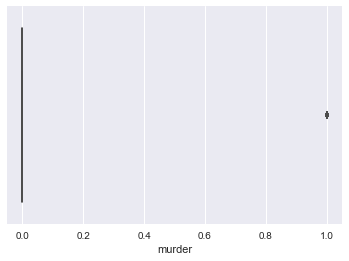

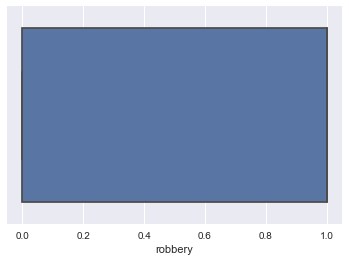

In [14]:
# Remove outliers
from scipy import stats

features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.815866321663293

R-squared: 
0.8444937611173492


### Improving the Regression Model

After using the provided multivariable regression functional form, let's attempt to add some useful features and fix any issues with the data to improve our R-squared. 

In [16]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,348.000,40037.632,450037.368,526.000,3003.000,7233.500,18427.500,8396126.000
Violent\ncrime,348.000,201.595,2815.269,0.000,2.000,6.000,22.000,52384.000
Murder and\nnonnegligent\nmanslaughter,348.000,1.566,18.304,0.000,0.000,0.000,0.000,335.000
Rape\n(revised\ndefinition)1,0.000,nan,nan,nan,nan,nan,nan,nan
Rape\n(legacy\ndefinition)2,348.000,5.865,60.425,0.000,0.000,0.000,2.000,1112.000
Robbery,348.000,72.902,1031.033,0.000,0.000,1.000,5.000,19170.000
Aggravated\nassault,348.000,121.261,1706.132,0.000,1.000,4.000,14.000,31767.000
Property\ncrime,348.000,792.606,7659.725,0.000,40.500,112.500,341.000,141971.000
Burglary,348.000,119.684,924.949,0.000,6.000,17.500,51.250,16606.000
Larceny-\ntheft,348.000,637.017,6346.054,0.000,31.000,94.000,287.250,117931.000


In [18]:
features.head()

,property_crime,population,pop_square,murder,robbery
0,12.000,1861.000,3463321.000,0,0
1,24.000,2577.000,6640929.000,0,0
2,16.000,2846.000,8099716.000,0,0
3,4090.000,97956.000,9595377936.000,1,1
4,223.000,6388.000,40806544.000,0,1


### First Additional Feature

The first feature I would like to include in order to better predict property crime will be to include Larceny-theft in our feature set.

In [19]:
# Adding 'theft' feature
features['theft'] = df['Larceny-\ntheft']

### Second New Feature

I also want to include Burglary in this updated regression which I would consider a strong indicator for property crime.

In [20]:
# Adding 'burglary' feature
features['burglary'] = df['Burglary']

In [21]:
features.head()

,property_crime,population,pop_square,murder,robbery,theft,burglary
0,12.000,1861.000,3463321.000,0,0,10.000,2.000
1,24.000,2577.000,6640929.000,0,0,20.000,3.000
2,16.000,2846.000,8099716.000,0,0,15.000,1.000
3,4090.000,97956.000,9595377936.000,1,1,3243.000,705.000
4,223.000,6388.000,40806544.000,0,1,165.000,53.000


In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 7 columns):
property_crime    347 non-null float64
population        347 non-null float64
pop_square        347 non-null float64
murder            347 non-null int64
robbery           347 non-null int64
theft             347 non-null float64
burglary          347 non-null float64
dtypes: float64(5), int64(2)
memory usage: 31.7 KB


                property_crime  population  pop_square  murder  robbery  \
property_crime           1.000       0.887       0.893   0.443    0.267   
population               0.887       1.000       0.889   0.503    0.344   
pop_square               0.893       0.889       1.000   0.345    0.152   
murder                   0.443       0.503       0.345   1.000    0.311   
robbery                  0.267       0.344       0.152   0.311    1.000   
theft                    0.995       0.901       0.873   0.458    0.297   
burglary                 0.977       0.820       0.893   0.402    0.197   

                theft  burglary  
property_crime  0.995     0.977  
population      0.901     0.820  
pop_square      0.873     0.893  
murder          0.458     0.402  
robbery         0.297     0.197  
theft           1.000     0.950  
burglary        0.950     1.000  


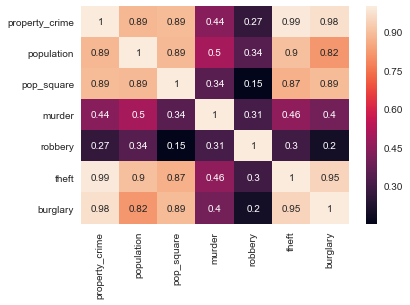

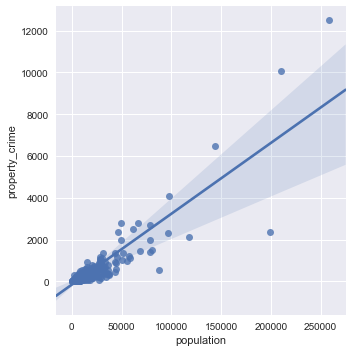

In [23]:
# Checking our correlations to target variable
corrmat2 = features.corr()
print(corrmat2)

# Making heatmap of correlations
sns.heatmap(corrmat2, annot=True)

# Making scatter plot showing linear relationship to target
sns.lmplot(
    x='population',
    y='property_crime', 
    data=features,
    scatter=True
)

plt.show()

In [24]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery', 'theft', 'burglary']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [-8.41820276e-05  5.00580263e-09 -4.62590057e-01  7.57826522e-01
  9.84180771e-01  1.21149814e+00]

Intercept: 
 0.06850894293626197

R-squared: 
0.9999099426310988


Very high R-squared, indicating overfitting. Let's remove ouliers once more from our features in hopes of getting a more realistic R-squared.

In [25]:
# Removing outliers
features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]

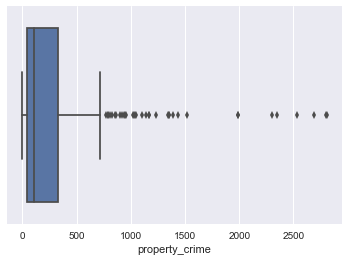

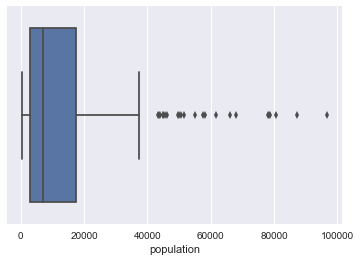

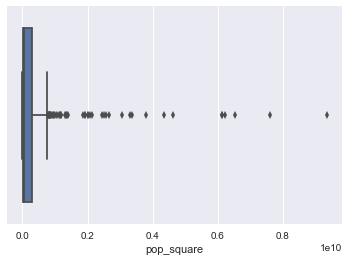

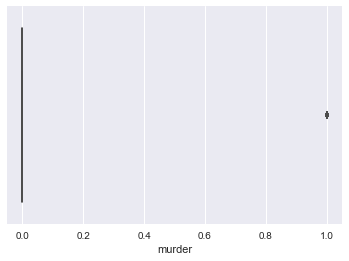

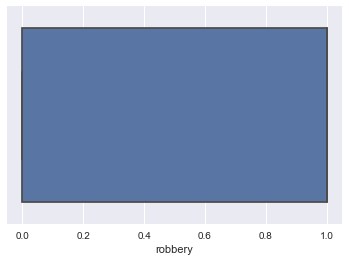

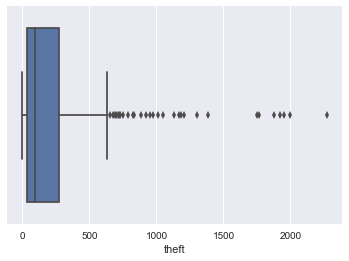

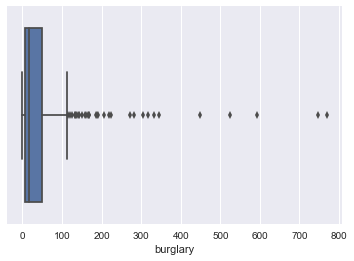

In [26]:

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [27]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery', 'theft', 'burglary']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [ 1.77865367e-04  3.26873264e-09  1.66460009e+00 -6.60707169e-01
  9.88786409e-01  1.16695913e+00]

Intercept: 
 -0.8801121076725735

R-squared: 
0.9996201230765853


### Validating our Model

In [28]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x, y).score(x, y)))

With 30% Holdout: 0.9996525256472183
Testing on Sample: 0.9996201230765853


In [29]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=20)
print('With 50% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x, y).score(x, y)))

With 50% Holdout: 0.9997348460106326
Testing on Sample: 0.9996201230765853


In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x, y, cv=10)

array([0.9997594 , 0.99995156, 0.99925012, 0.99938522, 0.99818246,
       0.99700049, 0.99985225, 0.99882553, 0.9998542 , 0.99978081])

Very consistent R^2 values across k-folds. Let's up the number of folds and check performance

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x, y, cv=20)

array([0.99950752, 0.99982003, 0.99997661, 0.99992652, 0.99948916,
       0.99915762, 0.99874795, 0.99954178, 0.99781318, 0.99935155,
       0.9990471 , 0.99654472, 0.99985901, 0.999647  , 0.99951773,
       0.99858063, 0.999862  , 0.99981236, 0.99990198, 0.99945506])

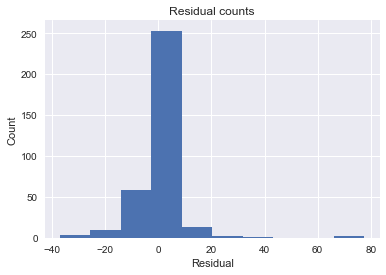

In [32]:
# Extract predicted values.
predicted = regr.predict(x).ravel()
actual = y

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

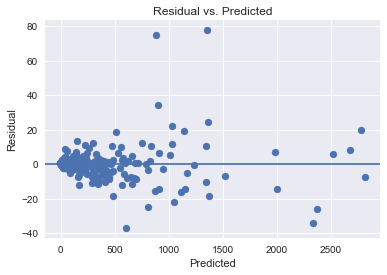

In [33]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


,property_crime,population,pop_square,murder,robbery,theft,burglary
property_crime,1.000,0.840,0.777,0.475,0.431,0.993,0.914
population,0.840,1.000,0.922,0.452,0.449,0.851,0.696
pop_square,0.777,0.922,1.000,0.347,0.290,0.791,0.624
murder,0.475,0.452,0.347,1.000,0.293,0.452,0.499
robbery,0.431,0.449,0.290,0.293,1.000,0.442,0.351
theft,0.993,0.851,0.791,0.452,0.442,1.000,0.859
burglary,0.914,0.696,0.624,0.499,0.351,0.859,1.000


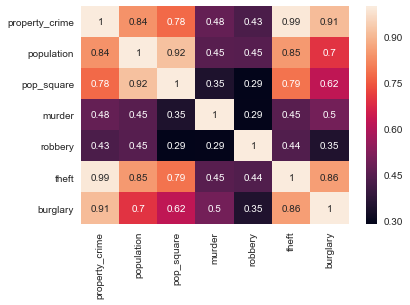

In [34]:
correlation_matrix = features.corr()
display(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)

### Revised model based on validation tests

Due to high correlation amongs 'population', 'pop_square' and 'theft'. I will PCA those features to retain the variance explained by those features. 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
features.head()

,property_crime,population,pop_square,murder,robbery,theft,burglary
0,12.000,1861.000,3463321.000,0,0,10.000,2.000
1,24.000,2577.000,6640929.000,0,0,20.000,3.000
2,16.000,2846.000,8099716.000,0,0,15.000,1.000
4,223.000,6388.000,40806544.000,0,1,165.000,53.000
5,46.000,4089.000,16719921.000,0,1,36.000,10.000


In [37]:
df_pca = features.loc[0:,['population','pop_square','theft', 'burglary']]

In [38]:
df_pca.head()

,population,pop_square,theft,burglary
0,1861.000,3463321.000,10.000,2.000
1,2577.000,6640929.000,20.000,3.000
2,2846.000,8099716.000,15.000,1.000
4,6388.000,40806544.000,165.000,53.000
5,4089.000,16719921.000,36.000,10.000


In [39]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix: \n', Cx)

Covariance Matrix: 
 [[1.00294118 0.92429542 0.85343976 0.69773492]
 [0.92429542 1.00294118 0.79335044 0.62546376]
 [0.85343976 0.79335044 1.00294118 0.86188016]
 [0.69773492 0.62546376 0.86188016 1.00294118]]


In [40]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained buy each',
    'component from Sklearn PCA. \n',
    sklearn_pca.explained_variance_ratio_)

The percentage of total variance in the dataset explained buy each component from Sklearn PCA. 
 [0.84404639 0.11398176 0.02468768 0.01728417]


In [41]:
print(Y_sklearn)

[[-1.10706962 -0.02832076  0.11378425  0.18652628]
 [-1.06274152 -0.03167408  0.0963823   0.16097902]
 [-1.07113408 -0.05783213  0.09530573  0.14617639]
 ...
 [-1.11186414  0.04361679  0.15303111  0.229646  ]
 [-0.85338727 -0.0270194   0.09727571  0.02666107]
 [ 1.24128752 -0.9598362   0.08880788 -0.61605382]]


In [42]:
features['pca'] = Y_sklearn[:,0]

In [43]:
features.head()

,property_crime,population,pop_square,murder,robbery,theft,burglary,pca
0,12.000,1861.000,3463321.000,0,0,10.000,2.000,-1.107
1,24.000,2577.000,6640929.000,0,0,20.000,3.000,-1.063
2,16.000,2846.000,8099716.000,0,0,15.000,1.000,-1.071
4,223.000,6388.000,40806544.000,0,1,165.000,53.000,-0.453
5,46.000,4089.000,16719921.000,0,1,36.000,10.000,-0.950


In [44]:
# Dropping PCA'd features
features = features.drop(labels=['population', 'pop_square', 'theft', 'burglary'], axis=1)

In [45]:
features.head()

,property_crime,murder,robbery,pca
0,12.000,0,0,-1.107
1,24.000,0,0,-1.063
2,16.000,0,0,-1.071
4,223.000,0,1,-0.453
5,46.000,0,1,-0.950


In [46]:
features.corr()

,property_crime,murder,robbery,pca
property_crime,1.000,0.475,0.431,0.959
murder,0.475,1.000,0.293,0.475
robbery,0.431,0.293,1.000,0.418
pca,0.959,0.475,0.418,1.000


,property_crime,murder,robbery,pca
property_crime,1.000,0.475,0.431,0.959
murder,0.475,1.000,0.293,0.475
robbery,0.431,0.293,1.000,0.418
pca,0.959,0.475,0.418,1.000


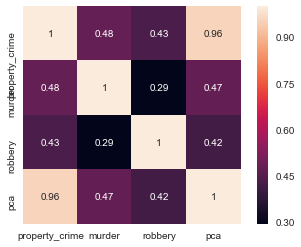

In [47]:
correlation_matrix = features.corr()
display(correlation_matrix)

sns.heatmap(correlation_matrix, square=True, annot=True);

In [48]:
x2 = features.drop('property_crime', axis=1)
y2 = features['property_crime']

from sklearn.model_selection import cross_val_score
cross_val_score(regr, x2, y2, cv=15)

array([0.93097105, 0.8874939 , 0.9770903 , 0.86289853, 0.86839017,
       0.91051937, 0.92359956, 0.79571756, 0.9436286 , 0.89112739,
       0.75372293, 0.47403533, 0.98008649, 0.95527005, 0.87323656])

Not great consistency across folds indicating poor performance of the model at this point. Resolutions for this inconsistency could be through transformations of either the target variable and/or input variables. However, let's move forward with our original revised model for validation on a new dataset: New York State crime data for 2014.

In [49]:
df2 = pd.read_excel('New York Crime Data 2014.xls', skiprows=4)

df2.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1851.000,0.000,0.000,nan,0.000,0.000,0.000,11.000,1.000,10.000,0.000,0.000
1,Addison Town and Village,2568.000,2.000,0.000,nan,0.000,1.000,1.000,49.000,1.000,47.000,1.000,0.000
2,Afton Village4,820.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
3,Akron Village,2842.000,1.000,0.000,nan,0.000,0.000,1.000,17.000,0.000,17.000,0.000,0.000
4,Albany4,98595.000,802.000,8.000,54.000,nan,237.000,503.000,3888.000,683.000,3083.000,122.000,12.000


In [50]:
df2.tail(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
366,Yonkers4,200624.000,974.000,3.000,33.000,nan,358.000,580.000,2009.000,414.000,1395.000,200.000,15.000
367,Yorktown Town4,36989.000,13.000,0.000,0.000,nan,0.000,13.000,209.000,24.000,182.000,3.000,0.000
368,Youngstown Village4,1896.000,0.000,0.000,0.000,nan,0.000,0.000,1.000,0.000,1.000,0.000,0.000
369,1 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
370,2 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
371,3 The FBI does not publish arson data unless i...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
372,4 This agency began the year submitting rape d...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
373,5 The FBI determined that the agency's data we...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
374,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
375,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [51]:
df2['City'] = df2['City'].str.replace('4', '')

df2 = df2.drop([369, 370, 371, 372, 373, 374, 375])

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 13 columns):
City                                    369 non-null object
Population                              369 non-null float64
Violent
crime                           369 non-null float64
Murder and
nonnegligent
manslaughter    369 non-null float64
Rape
(revised
definition)1              227 non-null float64
Rape
(legacy
definition)2               142 non-null float64
Robbery                                 369 non-null float64
Aggravated
assault                      369 non-null float64
Property
crime                          368 non-null float64
Burglary                                369 non-null float64
Larceny-
theft                          368 non-null float64
Motor
vehicle
theft                     369 non-null float64
Arson3                                  365 non-null float64
dtypes: float64(12), object(1)
memory usage: 40.4+ KB


In [53]:
# Dropping columns with all or mostly null values from df2
df2 = df2.drop(labels=['Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2'], axis=1)

In [54]:
# Create feature set including target variable
features2 = pd.DataFrame()
features2['property_crime'] = df2['Property\ncrime']
features2['population'] = df2['Population']
features2['pop_square'] = df2['Population'] ** 2
features2['murder'] = np.where(df2['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
features2['robbery'] = np.where(df2['Robbery'] > 0, 1, 0)
features2['theft'] = df2['Larceny-\ntheft']
features2['burglary'] = df2['Burglary']

features2.head()

,property_crime,population,pop_square,murder,robbery,theft,burglary
0,11.000,1851.000,3426201.000,0,0,10.000,1.000
1,49.000,2568.000,6594624.000,0,1,47.000,1.000
2,1.000,820.000,672400.000,0,0,1.000,0.000
3,17.000,2842.000,8076964.000,0,0,17.000,0.000
4,3888.000,98595.000,9720974025.000,1,1,3083.000,683.000


In [55]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 368
Data columns (total 7 columns):
property_crime    368 non-null float64
population        369 non-null float64
pop_square        369 non-null float64
murder            369 non-null int64
robbery           369 non-null int64
theft             368 non-null float64
burglary          369 non-null float64
dtypes: float64(5), int64(2)
memory usage: 23.1 KB


In [56]:
# missing data
total = features2.isnull().sum().sort_values(ascending=False)
percent = (features2.isnull().sum()/features2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
theft,1,0.003
property_crime,1,0.003
burglary,0,0.000
robbery,0,0.000
murder,0,0.000
pop_square,0,0.000
population,0,0.000


In [57]:
features2['theft'] = features2['theft'].fillna(np.mean(features2['theft']))
features2['property_crime'] = features2['property_crime'].fillna(np.mean(features2['property_crime']))

In [58]:
# missing data
total = features2.isnull().sum().sort_values(ascending=False)
percent = (features2.isnull().sum()/features2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
burglary,0,0.000
theft,0,0.000
robbery,0,0.000
murder,0,0.000
pop_square,0,0.000
population,0,0.000
property_crime,0,0.000


In [59]:
features2.describe().T

,count,mean,std,min,25%,50%,75%,max
property_crime,369.000,698.361,7113.928,0.000,25.000,77.000,276.000,135747.000
population,369.000,37814.824,441159.058,79.000,2631.000,6581.000,15408.000,8473938.000
pop_square,369.000,195523845923.664,3738110713430.991,6241.000,6922161.000,43309561.000,237406464.000,71807625227844.000
murder,369.000,0.138,0.346,0.000,0.000,0.000,0.000,1.000
robbery,369.000,0.531,0.500,0.000,0.000,1.000,1.000,1.000
theft,369.000,562.791,5861.870,0.000,20.000,61.000,230.000,112107.000
burglary,369.000,100.900,855.103,0.000,4.000,12.000,39.000,15916.000


                property_crime  population  pop_square  murder  robbery  \
property_crime           1.000       0.996       0.991   0.194    0.087   
population               0.996       1.000       0.998   0.163    0.072   
pop_square               0.991       0.998       1.000   0.131    0.049   
murder                   0.194       0.163       0.131   1.000    0.313   
robbery                  0.087       0.072       0.049   0.313    1.000   
theft                    1.000       0.998       0.993   0.188    0.085   
burglary                 0.991       0.976       0.966   0.235    0.104   

                theft  burglary  
property_crime  1.000     0.991  
population      0.998     0.976  
pop_square      0.993     0.966  
murder          0.188     0.235  
robbery         0.085     0.104  
theft           1.000     0.988  
burglary        0.988     1.000  


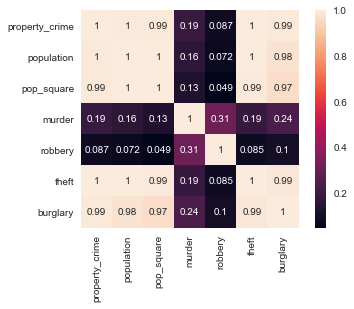

In [60]:
# Checking our correlations to target variable
corrmat3 = features2.corr()
print(corrmat3)

# Making heatmap of correlations
sns.heatmap(corrmat3, square=True, annot=True)

plt.show()

In [61]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x3 = features2[['population', 'pop_square', 'murder', 'robbery', 'theft', 'burglary']]
y3 = features2['property_crime']
# Fit our model to our data.
regr.fit(x3, y3)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x3, y3))


Coefficients: 
 [ 4.34423743e-04  2.01404497e-11 -1.05555710e+01 -4.14368859e+00
  9.76799344e-01  1.32760868e+00]

Intercept: 
 -2.0333013828633284

R-squared: 
0.9999963497676126


In [62]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=20)
print('With 30% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x3, y3).score(x3, y3)))

With 30% Holdout: 0.9998895150589555
Testing on Sample: 0.9999963497676126


In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(regr, x3, y3, cv=15)

array([ 0.99969078,  0.99992683,  0.99988703,  0.99843774,  0.9979056 ,
        0.99842602,  0.99906391,  0.99903878,  0.99958255, -5.15534132,
        0.99910387,  0.99991683,  0.99926855,  0.99989592,  0.99586311])